In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv("Automobile.csv")
df.head(2).transpose()

,0,1
symboling,3,3
normalized_losses,168,168
make,alfa-romero,alfa-romero
fuel_type,gas,gas
aspiration,std,std
number_of_doors,two,two
body_style,convertible,convertible
drive_wheels,rwd,rwd
engine_location,front,front
wheel_base,88.6,88.6


In [5]:
df.dtypes

symboling                int64
normalized_losses        int64
make                    object
fuel_type               object
aspiration              object
number_of_doors         object
body_style              object
drive_wheels            object
engine_location         object
wheel_base             float64
length                 float64
width                  float64
height                 float64
curb_weight              int64
engine_type             object
number_of_cylinders     object
engine_size              int64
fuel_system             object
bore                   float64
stroke                 float64
compression_ratio      float64
horsepower               int64
peak_rpm                 int64
city_mpg                 int64
highway_mpg              int64
price                    int64
dtype: object

In [6]:
# count na values for each variable
df.count().isna()

symboling              False
normalized_losses      False
make                   False
fuel_type              False
aspiration             False
number_of_doors        False
body_style             False
drive_wheels           False
engine_location        False
wheel_base             False
length                 False
width                  False
height                 False
curb_weight            False
engine_type            False
number_of_cylinders    False
engine_size            False
fuel_system            False
bore                   False
stroke                 False
compression_ratio      False
horsepower             False
peak_rpm               False
city_mpg               False
highway_mpg            False
price                  False
dtype: bool

In [7]:
# Drop variables with low varaince
df = df.drop('make', axis=1)
df = df.drop('fuel_type', axis=1)
df = df.drop('engine_location', axis=1)
df = df.drop('body_style', axis=1)
df = df.drop('drive_wheels', axis=1)
df = df.drop('engine_type', axis=1)
df = df.drop('fuel_system', axis=1)
df = df.drop('aspiration', axis=1)
df = df.drop('normalized_losses', axis=1)

In [8]:
df.dtypes
df.head()

,symboling,number_of_doors,wheel_base,length,width,height,curb_weight,number_of_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,two,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,13495
1,3,two,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,16500
2,1,two,94.5,171.2,65.5,52.4,2823,six,152,2.68,3.47,9.0,154,5000,19,26,16500
3,2,four,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.40,10.0,102,5500,24,30,13950
4,2,four,99.4,176.6,66.4,54.3,2824,five,136,3.19,3.40,8.0,115,5500,18,22,17450


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
symboling,201.0,0.840796,1.254802,-2.00,0.00,1.00,2.00,3.00
wheel_base,201.0,98.797015,6.066366,86.60,94.50,97.00,102.40,120.90
length,201.0,174.200995,12.322175,141.10,166.80,173.20,183.50,208.10
width,201.0,65.889055,2.101471,60.30,64.10,65.50,66.60,72.00
height,201.0,53.766667,2.447822,47.80,52.00,54.10,55.50,59.80
curb_weight,201.0,2555.666667,517.296727,1488.00,2169.00,2414.00,2926.00,4066.00
engine_size,201.0,126.875622,41.546834,61.00,98.00,120.00,141.00,326.00
bore,201.0,3.329701,0.268166,2.54,3.15,3.31,3.58,3.94
stroke,201.0,3.261741,0.317875,2.07,3.11,3.29,3.46,4.17
compression_ratio,201.0,10.164279,4.004965,7.00,8.60,9.00,9.40,23.00


In [11]:
df['number_of_doors'].unique()

array(['two', 'four'], dtype=object)

In [12]:
df['number_of_cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [13]:
df['number_of_cylinders'] = df['number_of_cylinders'].replace({'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12})

In [14]:
df['number_of_cylinders'].unique()

array([ 4,  6,  5,  3, 12,  2,  8], dtype=int64)

In [15]:
df['number_of_doors'] = df['number_of_doors'].replace({'two':2,'four':4})

In [16]:
df['number_of_doors'].unique()

array([2, 4], dtype=int64)

In [17]:
df.shape

(201, 17)

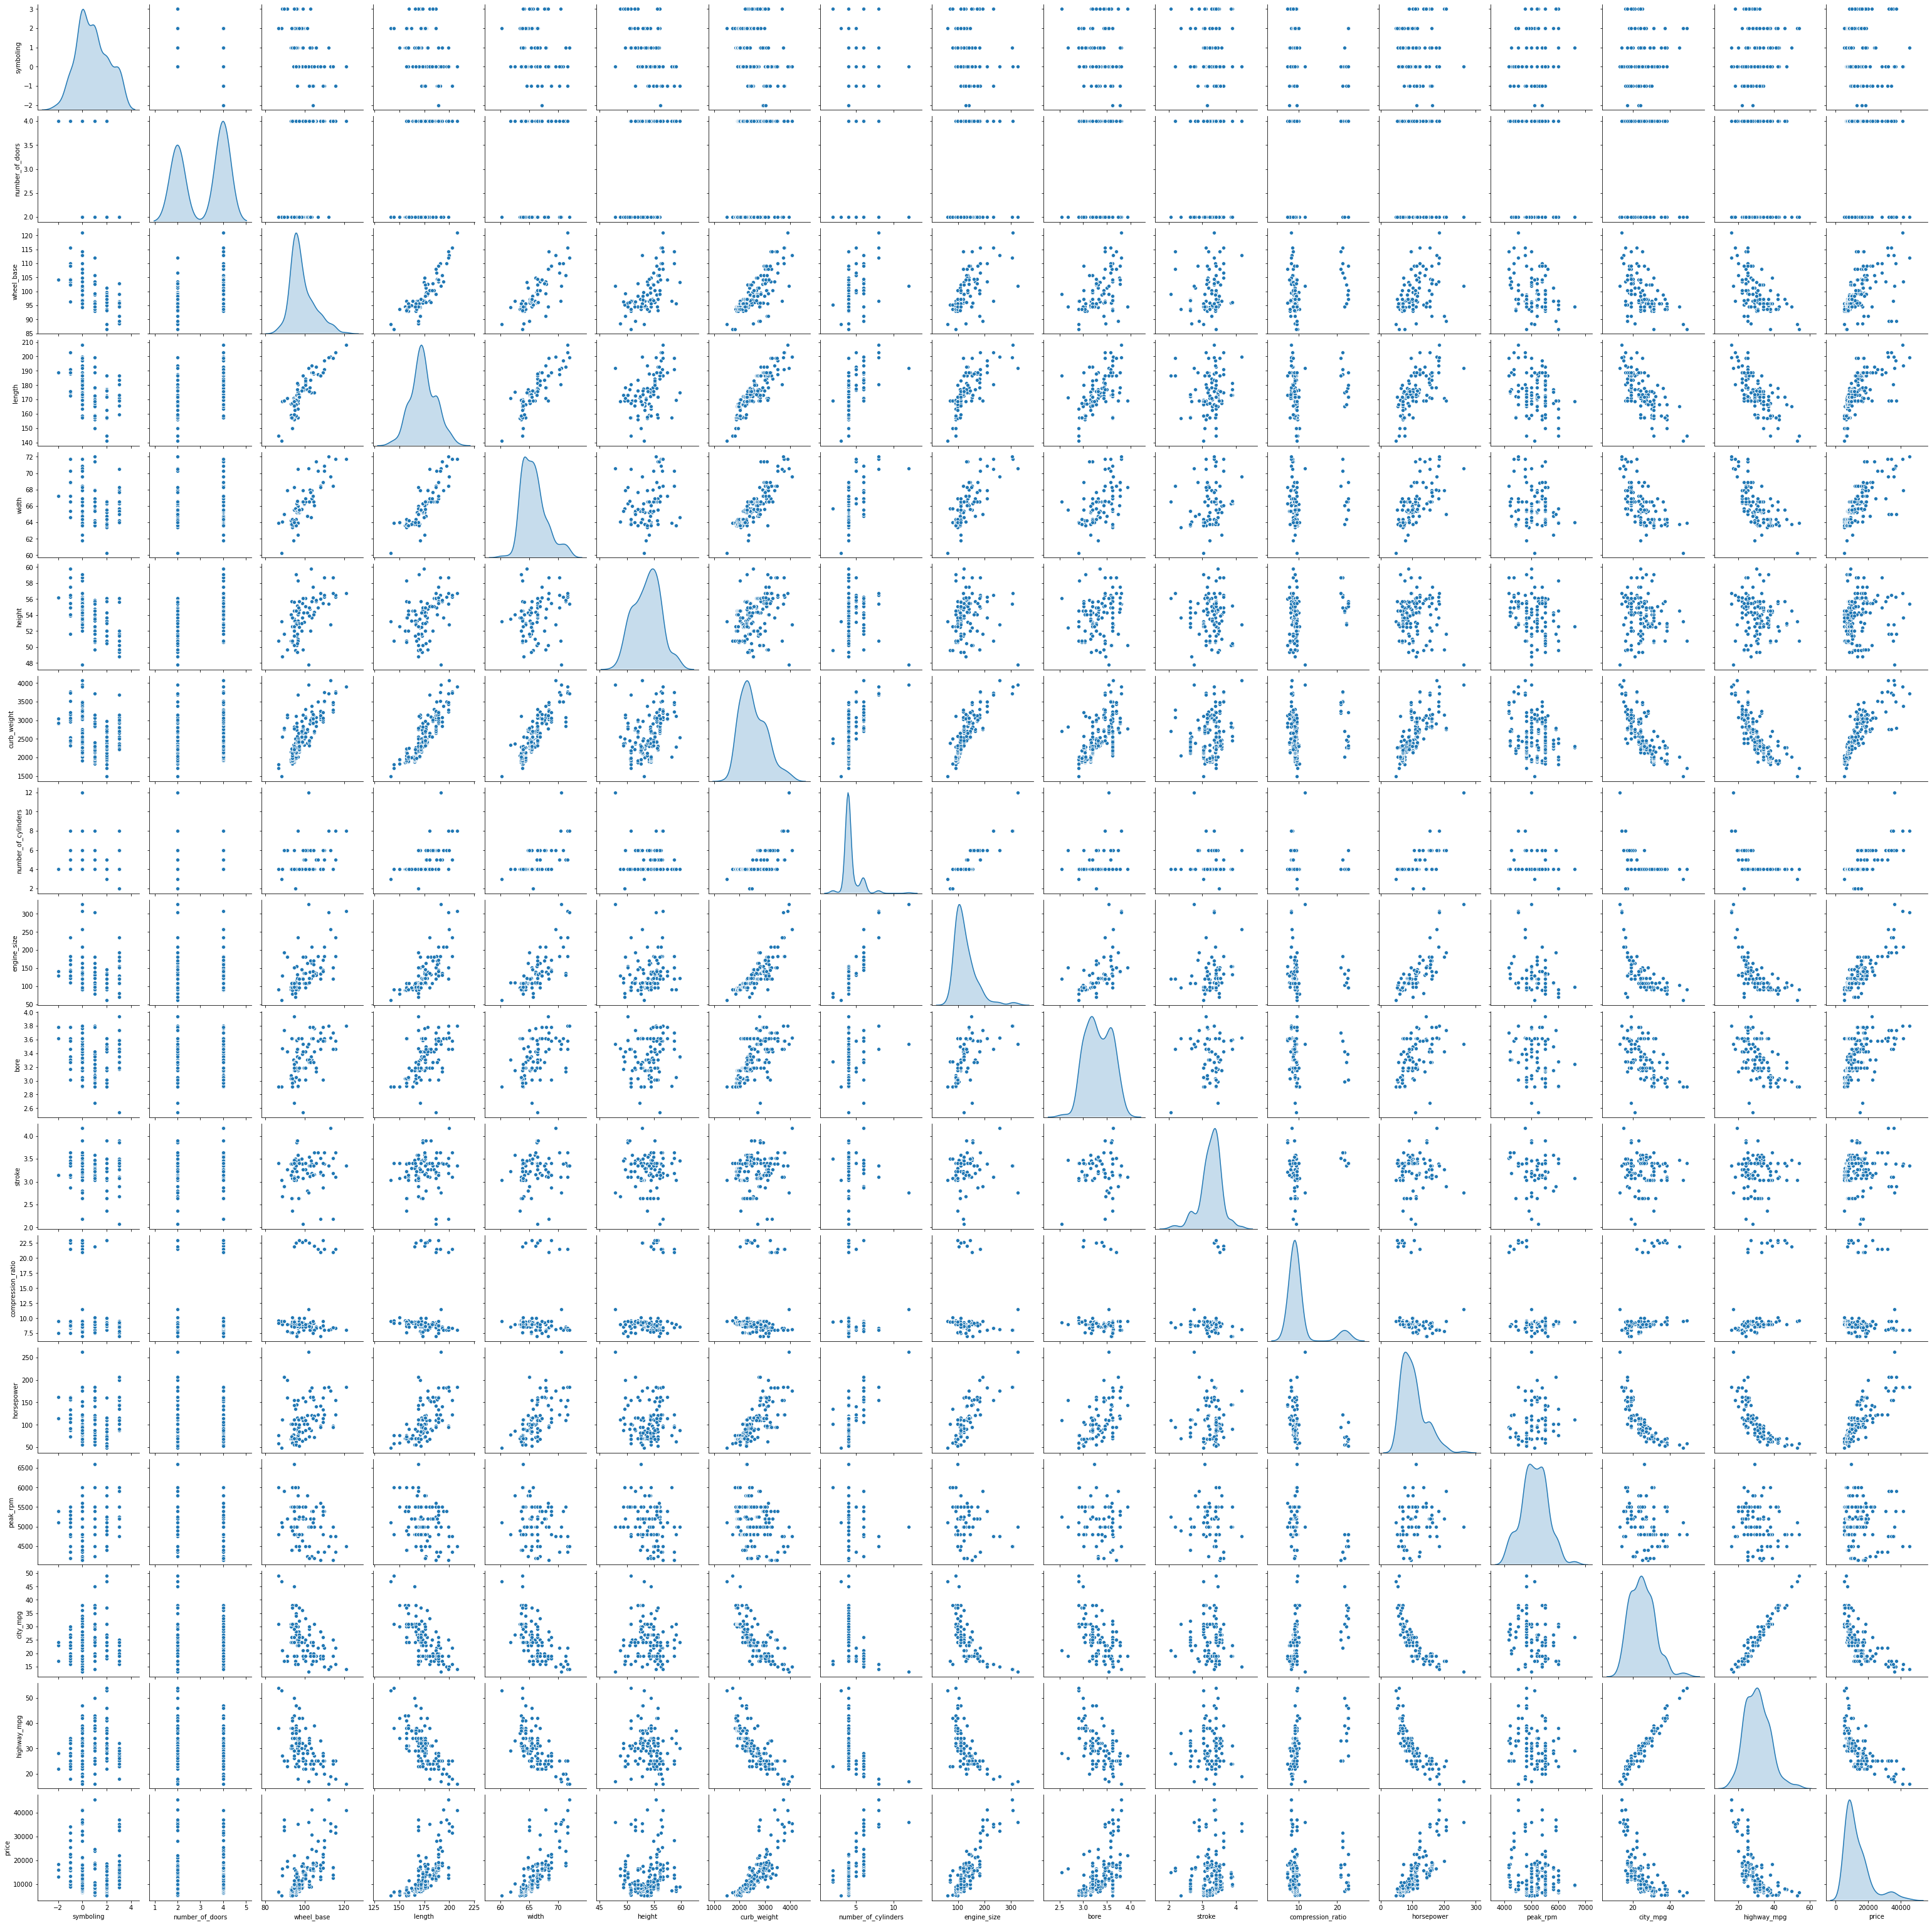

In [18]:
import seaborn as sns
#car_df_attr = car_df.iloc[:,1:16]
#sns.pairplot(car_df_attr, diag_kind = 'kde')

sns.pairplot(df, diag_kind = 'kde')

In [19]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
symboling,201.0,0.840796,1.254802,-2.00,0.00,1.00,2.00,3.00
number_of_doors,201.0,3.134328,0.993411,2.00,2.00,4.00,4.00,4.00
wheel_base,201.0,98.797015,6.066366,86.60,94.50,97.00,102.40,120.90
length,201.0,174.200995,12.322175,141.10,166.80,173.20,183.50,208.10
width,201.0,65.889055,2.101471,60.30,64.10,65.50,66.60,72.00
height,201.0,53.766667,2.447822,47.80,52.00,54.10,55.50,59.80
curb_weight,201.0,2555.666667,517.296727,1488.00,2169.00,2414.00,2926.00,4066.00
number_of_cylinders,201.0,4.363184,1.059452,2.00,4.00,4.00,4.00,12.00
engine_size,201.0,126.875622,41.546834,61.00,98.00,120.00,141.00,326.00
bore,201.0,3.329701,0.268166,2.54,3.15,3.31,3.58,3.94


In [20]:
x = df.drop('price', axis =1)
y = df[['price']]

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [23]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression()

In [24]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for symboling is 183.01702601088877
The coefficient for number_of_doors is 21.13446030510649
The coefficient for wheel_base is 152.37054233199822
The coefficient for length is -126.8736829058181
The coefficient for width is 529.4857697765002
The coefficient for height is 231.06460572048272
The coefficient for curb_weight is 0.5814273510214436
The coefficient for number_of_cylinders is -2234.9618337085167
The coefficient for engine_size is 190.84786974538815
The coefficient for bore is -3645.633819805356
The coefficient for stroke is -4640.373019878056
The coefficient for compression_ratio is 290.0728720492371
The coefficient for horsepower is 35.59520081210204
The coefficient for peak_rpm is 2.3936974734949117
The coefficient for city_mpg is -476.58205411868505
The coefficient for highway_mpg is 308.92545502760316


In [25]:
intercept = regression_model.intercept_[0]

In [26]:
print(intercept)

-32343.1288589123


In [27]:
regression_model.score(x_test,y_test)

0.804977064211456